In [21]:
from scipy.stats import norm
from scipy.stats import ks_2samp
import pylab as pl
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

%pylab inline
import os

if os.getenv ('PUI2016') is None:
    print("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [22]:
def getCitiBikeCSV(datestring):
    
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            print("File in place, you can continue.")

            if '2014' in datestring or '2013' in datestring:
                    os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                              "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
                print("WARNING!!! something is wrong: the file is not there!")
    else:
        print("File in place, you can continue.")

In [23]:
pwd

u'/wingrdp/homedirs/xd515/PUI2016_xd515/HW5_xd515'

In [24]:
datestring = '201503'
getCitiBikeCSV(datestring)

('Downloading', '201503')
File in place, you can continue.


In [25]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [26]:
df["age"] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,29.0
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,48.0
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,NaN
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,33.0
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,46.0


In [27]:
df = df.dropna(subset=['birth year'])
df.drop(['starttime','stoptime','usertype'], axis=1, inplace=1)
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age
count,3.289730e+05,328973.000000,328973.000000,328973.000000,328973.000000,328973.000000,328973.000000,328973.000000,328973.000000,328973.000000,328973.000000
mean,6.918292e+02,434.208737,40.735758,-73.990178,433.914814,40.735533,-73.990469,18058.585908,1975.293744,1.191377,40.706256
std,2.681675e+03,313.564307,0.018829,0.011750,313.063821,0.018781,0.011795,2086.161695,11.711420,0.394035,11.711420
min,6.000000e+01,72.000000,40.646768,-74.017134,72.000000,40.646768,-74.017134,14529.000000,1899.000000,0.000000,17.000000
25%,3.470000e+02,307.000000,40.723180,-73.998393,307.000000,40.722992,-73.998842,16287.000000,1967.000000,1.000000,31.000000
50%,5.270000e+02,415.000000,40.738177,-73.990093,412.000000,40.737262,-73.990617,18031.000000,1977.000000,1.000000,39.000000
75%,8.110000e+02,490.000000,40.750664,-73.981854,490.000000,40.750200,-73.981918,19823.000000,1985.000000,1.000000,49.000000
max,1.007614e+06,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21760.000000,1999.000000,2.000000,117.000000


### Plot the distribution of data.

In [28]:
bins = np.arange(10, 99, 1)
agedis = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])
agenorm = agedis/agedis.sum()

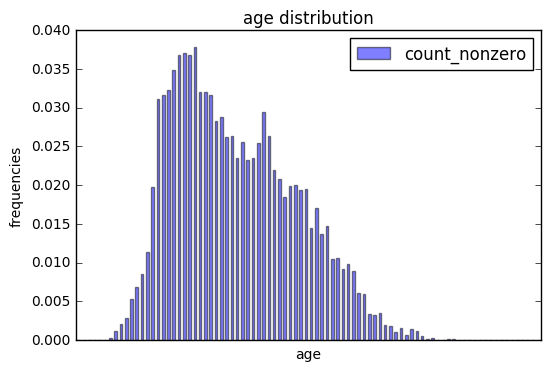

In [29]:
agenorm.plot(kind="bar", alpha=0.5)
pl.xticks([])
pl.title("age distribution")
pl.ylabel("frequencies")

## 1.Fit a normal distribution of the dataset.

In [30]:
def gaufunc(x, miu, sigma, t):
    a = -(x-miu)**2/(2*sigma**2)
    return t*exp(a)

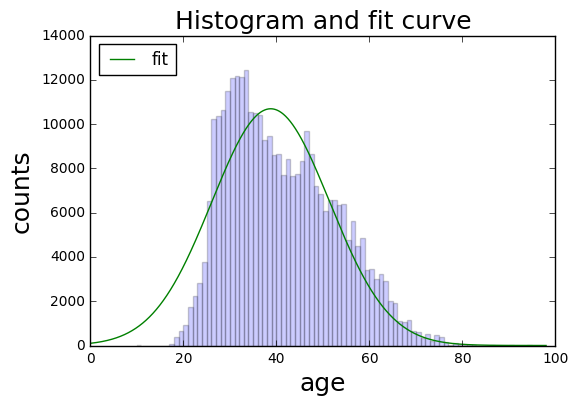

In [31]:
(n,bins,patches) = pl.hist(df.age,bins,alpha = 0.2)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 10000)
popt, pcov = curve_fit(gaufunc, x_lin, n, p0 = [30, 1, 10])
y = gaufunc(x_space, *popt)
pl.xlabel('age', fontsize = 18)
pl.ylabel('counts', fontsize = 18)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Histogram and fit curve',fontsize = 18)

In [35]:
print "the mean is: {}".format(popt[0])
print "the deviation is: {}".format(popt[1])

the mean is: 38.7788372792
the deviation is: 12.6741047524


## Make a KS test.

In [43]:
from scipy.stats import kstest
# Significance level $\alpha$=0.05
kstest(df.age, "norm", args=(37.7596344616,12.7006264286))

KstestResult(statistic=0.11926607375708759, pvalue=0.0)

### pvalue=0.0 < $\alpha$=0.05, it means that normal distribution does not fit this dataset.

## Make an AD test.

In [34]:
from scipy.stats import anderson
anderson(df.age, 'norm')

AndersonResult(statistic=3256.2673628629418, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

### AndersonReasult is so huge that it means normal distribution does not fit this dataset.

## 2. Fit a longist distribution of the dataset.

In [37]:
def logistic(x, miu, s, a):
    expo = exp(-(x-miu)/s)
    temp = (1 + expo)**2
    return a*expo/(s*temp)

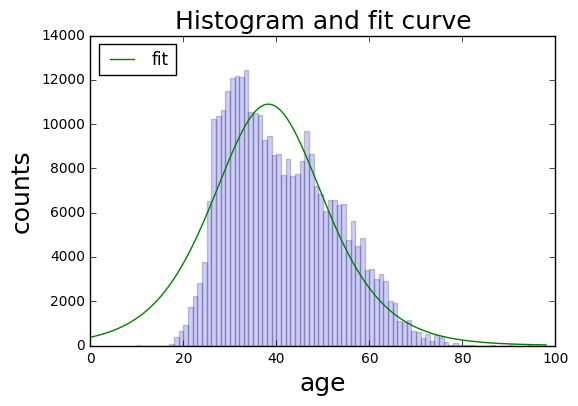

In [38]:
(n,bins,patches) = pl.hist(df.age, bins, alpha = 0.2)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 10000)
popt, pcov = curve_fit(logistic, x_lin, n, p0 = [40, 3.6, 10])
y = logistic(x_space, *popt)
pl.xlabel('age', fontsize = 18)
pl.ylabel('counts', fontsize = 18)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Histogram and fit curve',fontsize = 18)

In [39]:
popt

array([  3.82804763e+01,   8.07082402e+00,   3.51852568e+05])

In [40]:
print "the second mean is: {}".format(popt[0])
print "the second deviation is: {}".format(popt[1])

the second mean is: 38.2804762882
the second deviation is: 8.07082401821


## Make a KS test.

In [44]:
from scipy.stats import kstest
# Significance level $\alpha$=0.05
kstest(df.age, "logistic", args=(popt[0],popt[1]))

KstestResult(statistic=0.12345157277145125, pvalue=0.0)

### pvalue=0.0 < $\alpha$=0.05, it means that normal distribution does not fit this dataset.

## Make an AD test.

In [42]:
from scipy.stats import anderson
anderson(df.age, 'logistic')

AndersonResult(statistic=3408.4604186897632, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

### AndersonReasult is so huge that it means normal distribution does not fit this dataset.